----
# Laboratorium 3 - Zespolony szereg Fouriera
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznański

----
## 0 Zagadnienia do opanowania przed zajęciami:
---- 
### 0.1 Wyznaczanie współczynników zespolonego szeregu Fouriera
### 0.2 Zbieżność szeregu Fouriera
### 0.3 Efekt Gibbsa
*Literatura:*
- wykłady i ćwiczenia z przedmiotu Teoria Sygnałów
- R. Gabel, R. Robeerts, Sygnały i systemy liniowe, str. 181-197
- J. Izydorczyk, G. Płonka, G. Tyma, Teoria sygnałów, str. 1-19

### 0.4 Używanie języka Python, szczególnie biblioteki *sympy* w zakresie operacji całkowania oraz używania funkcji ekspotencjalnej, oraz funkcjonalności lambdify i Piecewise. Obsługa sympy w zakresie definiowania zmiennych i funkcji (sympy.symbol). 
- https://docs.sympy.org/latest/modules/integrals/integrals.html
- https://docs.sympy.org/latest/modules/functions/elementary.html#sympy-functions-elementary-exponential
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html

### 0.5 Określanie wzoru funkcji w zadanym przedziale na podstawie jej wykresu.

In [7]:
%matplotlib inline
import sympy 
import numpy as np
import matplotlib.pyplot as plt 
import ipywidgets

----
## 1. Określanie wzorów funkcji
----
### Zadanie: Na podstawie poniższych wykresów określ wzór funkcji w odpowiednim zakresie wartości
<table><tr><td>
Funkcja A
<br>
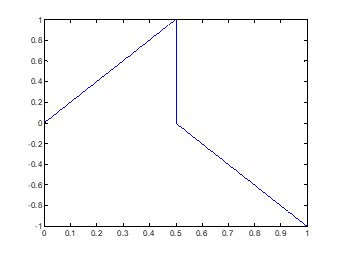
</td><td>
Funkcja B
<br>
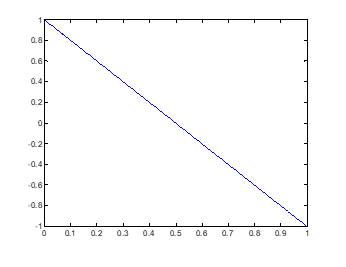
</td><td>
Funkcja C
<br>
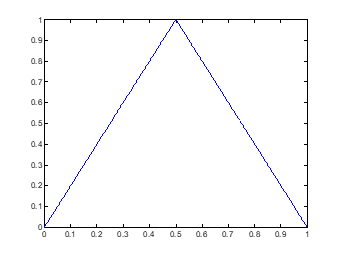
</td></tr><tr><td>
Funkcja D
<br>
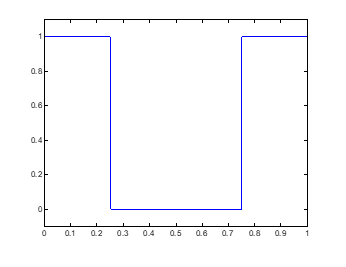
</td><td>
Funkcja E
<br>
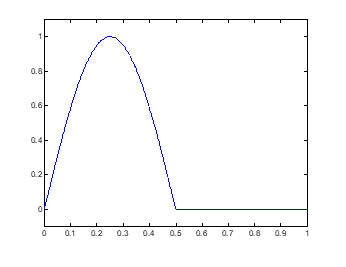
</td><td>
Funkcja F
<br>
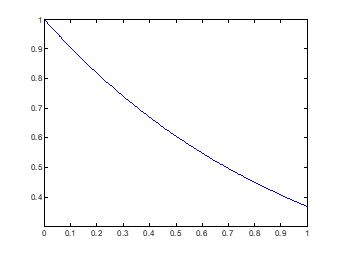
</td></tr>

----
## 2. Wyliczanie próbek funkcji
----
### Zadanie: Zdefiniuj wektor zawierający próbki jednego okresu badanej funkcji (składający się z przynajmniej 200 elementów). Wyświetl wyznaczone próbki na wykresie (matlplotlib). 
Definicje funkcji uzależnij od `T`.  
Podpowiedź: użyj `sympy.Piecewise` do zdefiniowania funkcji oraz `sympy.lambdify` 


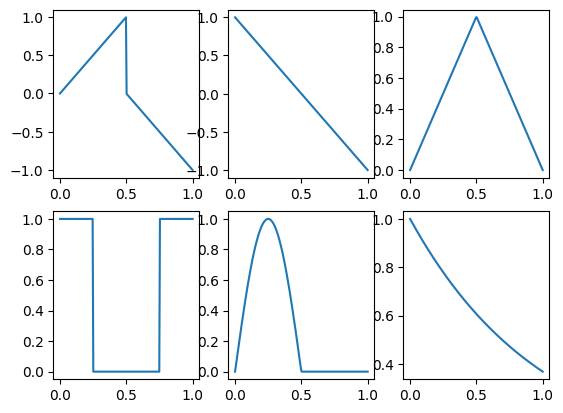

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 

#declare symbolic variable t (time) and period (T=1)
t = sp.Symbol('t', real = 'True', nonzero = 'True') 
T = 1
NumberOfSamples = 200

#declare functions (fA, fB, ... fF)
fA = sp.Piecewise((2*t, (t>=0)&(t<0.5)), ((-2*t)+1, (t>=0.5)))
fAimpl = sp.lambdify(t, fA)
times = np.linspace(0, 1, NumberOfSamples)
yA = fAimpl(times)
plt.subplot(2, 3, 1)
plt.plot(times, yA)

fB = sp.Piecewise(((-2*t)+1, t>=0))
fBimpl = sp.lambdify(t, fB)
times = np.linspace(0, 1, NumberOfSamples)
yB = fBimpl(times)
plt.subplot(2, 3, 2)
plt.plot(times, yB)

fC = sp.Piecewise((2*t, (t>=0)&(t<0.5)), ((-2*t)+2, (t>=0.5)))
fCimpl = sp.lambdify(t, fC)
times = np.linspace(0, 1, NumberOfSamples)
yC = fCimpl(times)
plt.subplot(2, 3, 3)
plt.plot(times, yC)

fD = sp.Piecewise((1, (t>=0)&(t<0.25)), (0, (t>=0.25)&(t<0.75)), (1, (t>=0.75)))
fDimpl = sp.lambdify(t, fD)
times = np.linspace(0, 1, NumberOfSamples)
yD = fDimpl(times)
plt.subplot(2, 3, 4)
plt.plot(times, yD)

fE = sp.Piecewise((sp.sin(t*(sp.pi*2)), (t>=0)&(t<0.5)), (0, (t>=0.5)))
fEimpl = sp.lambdify(t, fE)
times = np.linspace(0, 1, NumberOfSamples)
yE = fEimpl(times)
plt.subplot(2, 3, 5)
plt.plot(times, yE)

fF = sp.Piecewise((sp.exp(-t), (t>=0)))
fFimpl = sp.lambdify(t, fF)
times = np.linspace(0, 1, NumberOfSamples)
yF = fFimpl(times)
plt.subplot(2, 3, 6)
plt.plot(times, yF)

#plot the selected function
plt.show()

----
## 3. Wyznaczanie współczynników szeregu Fouriera (analityczne)
----
### Zadanie: Na podstawie wyznaczonych wzorów funkcji znajdź rozwinięcie funkcji w szereg Fouriera. Skorzystaj z biblioteki sympy w środowisku Python. 
- Jakie założenie należy przyjąć przy wyznaczaniu współczynników szeregu Fouriera ?

$$ f(t) = \sum_{k=-\infty}^{\infty} F_k e^{j k {{2 \pi } \over T } t} \text{   for:   } k \in \mathbb{C} $$ 

$$ F_0 = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}}f(t)dt  $$

$$ F_k = { 1 \over T } \int\limits_{-{T \over 2}}^{{T \over 2}} f(t) e^{-jkt {2\pi \over T}} dt \text{   for:   } k \in \mathbb{C}, k \neq 0 $$

Podpowiedź: funkcje `sympy.exp`, `sympy.simplify`, `sympy.integrate`

In [9]:
#declare symbolic variable k
k = sp.Symbol('k', real = 'True', nonzero=True, positive=True, integer=True)

def determineFourierCoefficients(Function, RangeBeg, RangeEnd, DisplayCoeffs=True):
    #declare kernel
    kernel = sp.exp(-sp.I*k*t*2*sp.pi/T)
    
    #determine F0
    F0 = (1/T)*sp.integrate(Function, (t, RangeBeg, RangeEnd))
        
    #determine Fk
    Fk = (1/T)*sp.integrate(Function*kernel, (t, RangeBeg, RangeEnd))
    
    return F0, Fk

currFun = fA
F0, Fk = determineFourierCoefficients(currFun, 0, T)

display(F0)
display(Fk)

0

0.5*(-I*pi*k - 1)/(pi**2*k**2) + 0.5*(1.0*I*pi*k + 1)*exp(-1.0*I*pi*k)/(pi**2*k**2) - 0.5/(pi**2*k**2) + 0.5*exp(-1.0*I*pi*k)/(pi**2*k**2)

----
## 4. Wyznaczanie wartości pierwszych 10 współczynników szeregu Fouriera
---- 
Zadanie: Wygeneruj wektor zawierający 10 pierwszych współczynników szeregu Fouriera

Podpowiedz: wykorzystaj funkcje z poprzednich zadań, pamiętaj że współczynniki zespolonego szeregu Fouriera należą do zbioru liczb **ZESPOLONYCH** (użyj odpowiedniego typu danych - `np.cdouble`)

In [10]:
#create array containing calculated coefficients
Fkimpl = sp.lambdify(k, Fk)
Fk_vec = [F0]

for i in range(1, 10):
    Fk_vec += [np.real(Fkimpl(i))]

#print array content
print(Fk_vec)


[0, -0.20264236728467555, -1.9081958235744878e-17, -0.02251581858718615, -1.951563910473908e-17, -0.008105694691387002, -1.951563910473908e-17, -0.004135558516013767, -1.951563910473908e-17, -0.002501757620798444]


----
## 5. Rekonstrukcja sygnału
----
Wykorzystując klasę `xInteractiveFourier` oraz metody `xInteractiveFourier.complexFourierSeries` oraz `xInteractiveFourier.createDemo` zaobserwuj proces proces kolejnego przybliżania sygnału sumą początkowych wyrazów przebiegu. Zwróć uwagę na błędy aproksymacji występujące w ewentualnych punktach nieciągłości oraz przeanalizuj zależność błędu średniokwadratowego i maksymalnego od liczby składników szeregu. 

Funkcja `xInteractiveFourier.complexFourierSeries` jako argumenty przyjmuje: F0 - wartość współczynnika F0, Fk - wyrażenie na współczynniki fk, Samples - próbki aproksymowanej funkcji, rangeStart - minimalny argument aproksymowanej funkcji, rangeStop - maksymalny argument aproksymowanej funkcji. 

Następnie sprawdz, jak wyglądają przebiegi aproksymowane z uzyciem współczynników szeregu, które niosą jedynie informacje o amlitudzie $abs(fk)$ oraz zwpółczynników które niosą tylko informację o fazie $e^{j\phi}$. W tym celu dodaj "mag" lub "phase" jako dodatkowy argument funkcji `complexFourierSeries`.

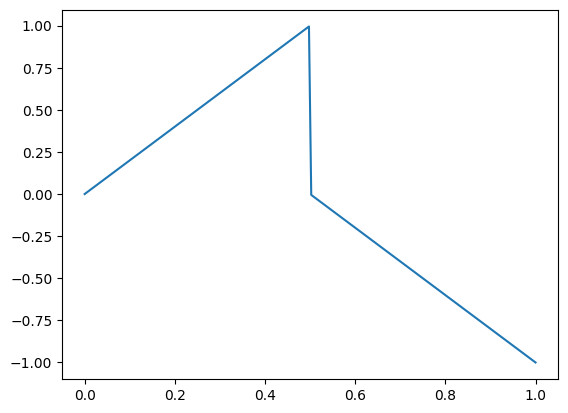

In [11]:
from xInteractiveFourier import *

FigSize = (16, 10)
MaxNumCoeffs = 20  #max num coeff used for demo

F0, Fk  = determineFourierCoefficients(currFun, 0, T, DisplayCoeffs=False)
Samples = sp.lambdify(t, currFun, 'numpy')(np.linspace(0, T, NumberOfSamples))

plt.plot(np.linspace(0, T, NumberOfSamples), Samples)

#InteractiveFourier = xInteractiveFourier(MaxNumCoeffs)
#InteractiveFourier.complexFourierSeries(F0, Fk, Samples, 0, T)
#Demo = InteractiveFourier.createDemo(FigSize)
#Demo

----
## 6. Zadania dodatkowe
----
### Zadanie 6.1
Dla wyznaczonych funkcji z zadania 1 wyznacz wyrażenia na współczynniki zespolonego szeregu Fouriera w sposób analityczny i porównaj wyniki. 

### Zadanie 6.2
Wykonaj polecenia z zadań C, D i E dla trygonometrycznego szeregu Fouriera (wzory z wykładu/literatury). Zmodyfikuj funkcję $complexFourierSeries$ lub zbuduj na jej podstawię funkcję rekonstruującą sygnał na podstawie podanych wyrażeń na współczynniki a1, ak i bk. Porównaj otrzymane aproksymacje dla trygonometrycznego i zespolonego szeregu Fouriera. 